In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import processed files
m_2309_lst_sml = pd.read_csv('processed/m_2309_lst_sml.csv')
m_2309_cal = pd.read_csv('processed/m_2309_cal.csv')
m_2212_lst_sml = pd.read_csv('processed/m_2212_lst_sml.csv')
m_2212_cal = pd.read_csv('processed/m_2212_cal.csv')
b_2309_lst_sml = pd.read_csv('processed/b_2309_lst_sml.csv')
b_2309_cal = pd.read_csv('processed/b_2309_cal.csv')
b_2212_lst_sml = pd.read_csv('processed/b_2212_lst_sml.csv')
b_2212_cal = pd.read_csv('processed/b_2212_cal.csv')

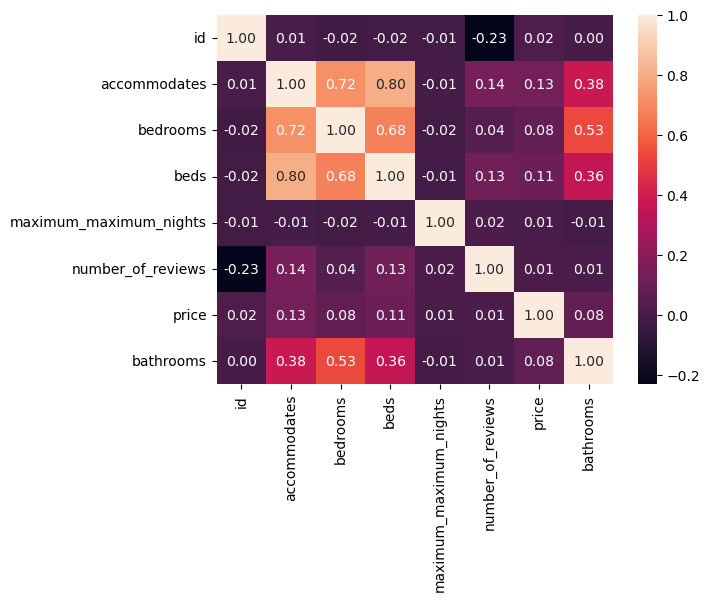

In [3]:
# check for need to analyze certain variables with correlation matrix
sns.heatmap(b_2309_lst_sml.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f");

In [4]:
# Create data frame containing number of listings per city and date
cities = ['Munich', 'Berlin']
listings = {'Listings Dec 2022': [m_2212_lst_sml['id'].nunique(), b_2212_lst_sml['id'].nunique()],
           'Listings Sep 2023': [m_2309_lst_sml['id'].nunique(), b_2309_lst_sml['id'].nunique()]}

no_of_lst = pd.DataFrame(listings, index=cities)
#Add number of population
no_of_lst['Inhabitants'] = [1581740, 3866385]
no_of_lst['Listings per Inhabitant Dec 2022'] = no_of_lst['Listings Dec 2022'] / no_of_lst['Inhabitants']
no_of_lst['Listings per Inhabitant Sep 2023'] = no_of_lst['Listings Sep 2023'] / no_of_lst['Inhabitants']
no_of_lst

,Listings Dec 2022,Listings Sep 2023,Inhabitants,Listings per Inhabitant Dec 2022,Listings per Inhabitant Sep 2023
Munich,5784,7336,1581740,0.003657,0.004638
Berlin,15717,13134,3866385,0.004065,0.003397


In [5]:
#avg number of guests and bathrooms as proxy for size
cities = ['Munich', 'Berlin']
guests_bathrooms = {'Avg. number of guests': [round(np.mean(m_2309_lst_sml.accommodates),2), round(np.mean(b_2309_lst_sml.accommodates),2)],
           'Avg. number of bathrooms': [round(np.mean(m_2309_lst_sml.bathrooms),2), round(np.mean(b_2309_lst_sml.bathrooms),2)]}
df_guests_bathrooms = pd.DataFrame(guests_bathrooms, index=cities)
df_guests_bathrooms

,Avg. number of guests,Avg. number of bathrooms
Munich,2.77,1.15
Berlin,2.92,1.13


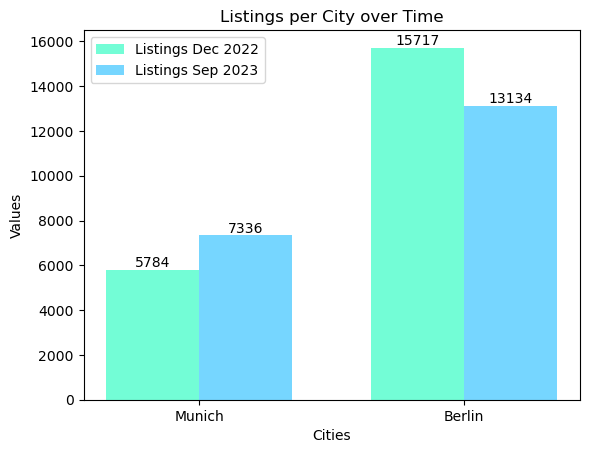

In [6]:
#development of number of listings over time in Munich and Berlin
categories = ['Munich', 'Berlin']
group1 = no_of_lst['Listings Dec 2022']
group2 = no_of_lst['Listings Sep 2023']

bar_width = 0.35
x = np.arange(len(categories))
fig, ax = plt.subplots()
ax.bar(x, group1, bar_width, label='Listings Dec 2022', color = '#73FDD6')
ax.bar(x + bar_width, group2, bar_width, label='Listings Sep 2023', color = '#76D6FF')

ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(categories)
ax.set_xlabel('Cities')
ax.set_ylabel('Values')
ax.set_title('Listings per City over Time')

for i, v in enumerate(group1):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)
for i, v in enumerate(group2):
    ax.text(i + bar_width, v, str(v), ha='center', va='bottom', fontsize=10)

ax.legend()
plt.show()

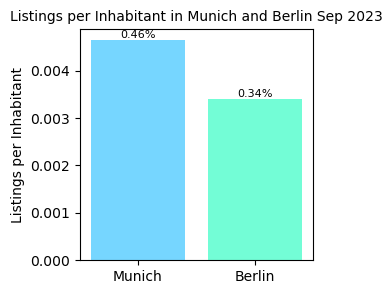

In [7]:
# as cities have different number of population calculate listings per inhabitant
filtered_df = no_of_lst[['Listings per Inhabitant Sep 2023']]

plt.figure(figsize=(3, 3))
plt.bar(filtered_df.index, filtered_df['Listings per Inhabitant Sep 2023'], color = ['#76D6FF','#73FDD6'])
plt.ylabel('Listings per Inhabitant', fontsize = 10)
plt.xticks(fontsize=10)
plt.title('Listings per Inhabitant in Munich and Berlin Sep 2023', fontsize=10)

for i, v in enumerate(filtered_df['Listings per Inhabitant Sep 2023']):
    plt.text(i, v, f"{v:.2%}", ha='center', va='bottom', fontsize=8)

plt.show()

On average, there is space for 2.767175572519084 people per apartment in Munich


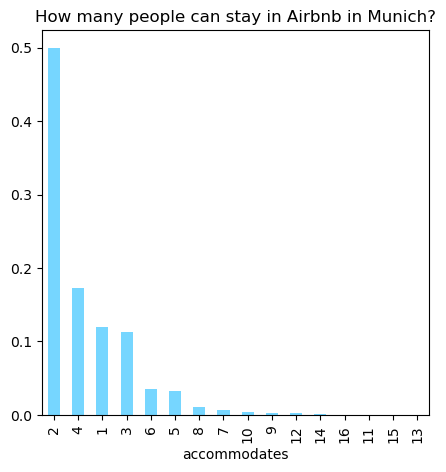

In [8]:
# no information on square meters accessbile, thus avg. number of max guests
accommodates_vals = m_2309_lst_sml.accommodates.value_counts()
plt.figure(figsize=(5, 5))
(accommodates_vals/m_2309_lst_sml.shape[0]).plot(kind="bar", color = '#76D6FF');
plt.title("How many people can stay in Airbnb in Munich?");

print('On average, there is space for {} people per apartment in Munich'.format(np.mean(m_2309_lst_sml.accommodates)))

On average, there is space for 2.9173138419369575 people per apartment in Berlin


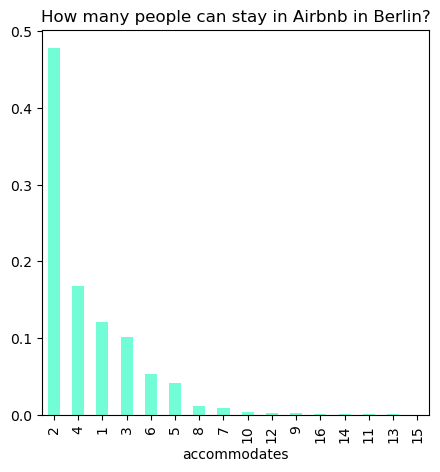

In [9]:
accommodates_vals = b_2309_lst_sml.accommodates.value_counts()
plt.figure(figsize=(5, 5))
(accommodates_vals/b_2309_lst_sml.shape[0]).plot(kind="bar", color = '#73FDD6');
plt.title("How many people can stay in Airbnb in Berlin?");

print('On average, there is space for {} people per apartment in Berlin'.format(np.mean(b_2309_lst_sml.accommodates)))

On average, there are 1.146765829694323 bathrooms in Airbnbs in Munich


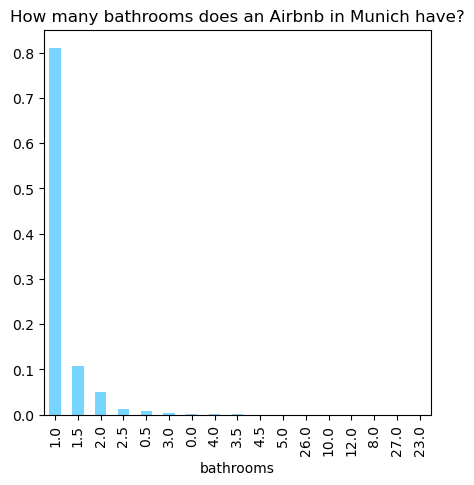

In [10]:
# ...same for bathrooms
bathrooms_vals = m_2309_lst_sml.bathrooms.value_counts()
plt.figure(figsize=(5, 5))
(bathrooms_vals/m_2309_lst_sml.shape[0]).plot(kind="bar", color = '#76D6FF');
plt.title("How many bathrooms does an Airbnb in Munich have?");

print('On average, there are {} bathrooms in Airbnbs in Munich'.format(np.mean(m_2309_lst_sml.bathrooms)))

On average, there are 1.13 bathrooms in Airbnbs in Berlin


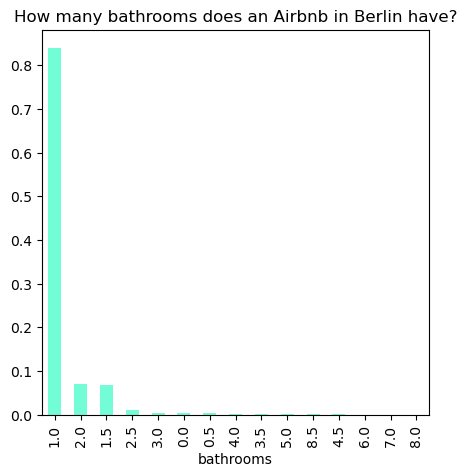

In [11]:
bathrooms_vals = b_2309_lst_sml.bathrooms.value_counts()
plt.figure(figsize=(5, 5))
(bathrooms_vals/b_2309_lst_sml.shape[0]).plot(kind="bar", color = '#73FDD6');
plt.title("How many bathrooms does an Airbnb in Berlin have?");

print('On average, there are {} bathrooms in Airbnbs in Berlin'.format(round(np.mean(b_2309_lst_sml.bathrooms),2)))

In [12]:
# next, I plot the most favourite property types

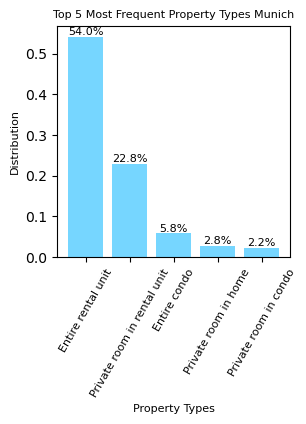

In [13]:
# Get the value counts for the column
value_counts = m_2309_lst_sml['property_type'].value_counts().head(5) / m_2309_lst_sml.shape[0]
percentages = value_counts * 100

# Bar chart
plt.figure(figsize=(3, 3))
plt.bar(value_counts.index, value_counts.values, color = '#76D6FF')
plt.xlabel('Property Types', fontsize = 8)
plt.ylabel('Distribution', fontsize = 8)
plt.xticks(fontsize=8)
plt.title('Top 5 Most Frequent Property Types Munich', fontsize=8)

# Add value annotations
for i, v in enumerate(value_counts.values):
    plt.text(i, v, f'{percentages[i]:.1f}%', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=60)
plt.show()

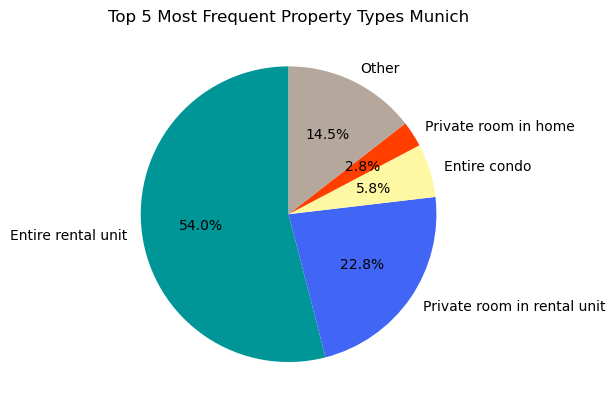

In [14]:
# Calculate the proportion of each category
proportions = m_2309_lst_sml['property_type'].value_counts(normalize=True)

# Set a threshold for the small categories
threshold = 0.025

# Combine small categories into "Other"
other_proportion = proportions[proportions < threshold].sum()
proportions = proportions[proportions >= threshold]
proportions['Other'] = other_proportion

# Plot the pie chart
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle = 90, colors = ['#009698','#4166f5', '#fff8a3','#ff3e00','#b5a79b'])

plt.title('Top 5 Most Frequent Property Types Munich')
plt.show()

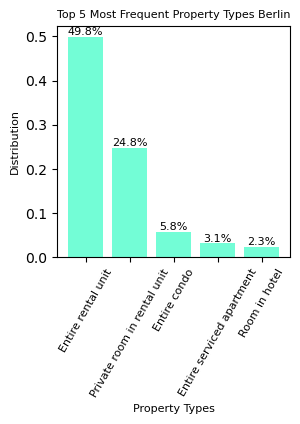

In [15]:
# Get the value counts for the column
value_counts = b_2309_lst_sml['property_type'].value_counts().head(5) / b_2309_lst_sml.shape[0]
percentages = value_counts * 100

# Bar chart
plt.figure(figsize=(3, 3))
plt.bar(value_counts.index, value_counts.values, color = '#73FDD6')
plt.xlabel('Property Types', fontsize = 8)
plt.ylabel('Distribution', fontsize = 8)
plt.xticks(fontsize=8)
plt.title('Top 5 Most Frequent Property Types Berlin', fontsize=8)

# Add value annotations
for i, v in enumerate(value_counts.values):
    plt.text(i, v, f'{percentages[i]:.1f}%', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=60)
plt.show()

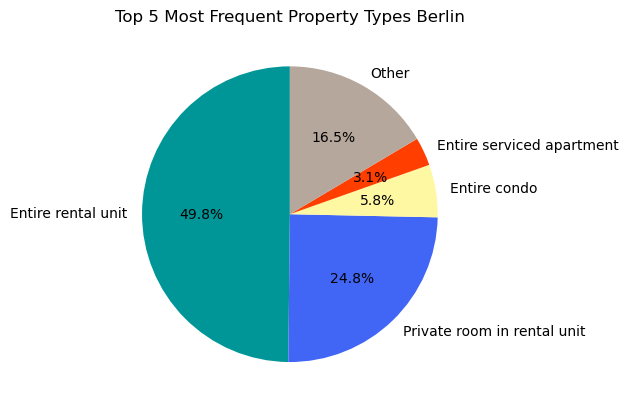

In [16]:
# Calculate the proportion of each category
proportions = b_2309_lst_sml['property_type'].value_counts(normalize=True)

# Set a threshold for the small categories
threshold = 0.025

# Combine small categories into "Other"
other_proportion = proportions[proportions < threshold].sum()
proportions = proportions[proportions >= threshold]
proportions['Other'] = other_proportion

# Plot the pie chart
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle = 90, colors = ['#009698','#4166f5', '#fff8a3','#ff3e00','#b5a79b'])

plt.title('Top 5 Most Frequent Property Types Berlin')
plt.show()

In [17]:
# some information on prices

(0.0, 0.009)

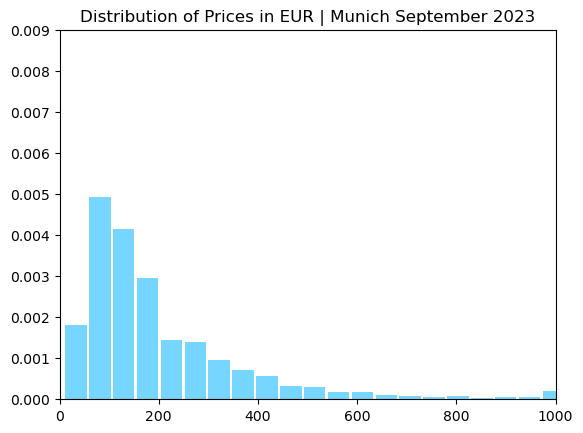

In [18]:
plt.hist(m_2309_lst_sml['price'], bins=2000, rwidth=0.9, density = True, color = '#76D6FF')
plt.title('Distribution of Prices in EUR | Munich September 2023')
plt.xlim(0, 1000)
plt.ylim(0, 0.009)

(0.0, 0.009)

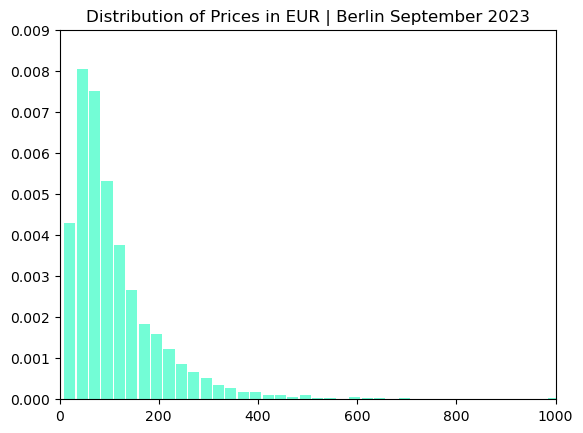

In [19]:
plt.hist(b_2309_lst_sml['price'], bins=1000, rwidth=0.9, density = True, color = '#73FDD6')
plt.title('Distribution of Prices in EUR | Berlin September 2023')
plt.xlim(0, 1000)
plt.ylim(0, 0.009)

#### it seems like there are some extreme values. Thus, i will clean the data further

# Analyze prices in Munich Sep 2023

In [20]:
# Calculate the 2nd and 98th percentiles
percentile_2 = m_2309_lst_sml['price'].quantile(0.02)
percentile_98 = m_2309_lst_sml['price'].quantile(0.98)

# Filter the DataFrame to exclude values outside the 5th and 95th percentiles
filtered_data = m_2309_lst_sml[(m_2309_lst_sml['price'] >= percentile_2) & (m_2309_lst_sml['price'] <= percentile_98)]

# Group by 'neighbourhood_cleansed' and calculate the mean and count
labels = {'price': 'Average Price', 'property_type': 'Property Type'}

result = filtered_data.groupby('neighbourhood_cleansed')[['price', 'accommodates', 'bathrooms']].agg(mean_price=('price', 'mean'), count_price =('price','count'), mean_accom=('accommodates', 'mean'), mean_bath=('bathrooms', 'mean')).sort_values(by='mean_price', ascending=False)
result = result[result['count_price']>30]

In [21]:
result[['mean_price', 'mean_accom', 'mean_bath']].round(1).head(3)

,mean_price,mean_accom,mean_bath
neighbourhood_cleansed,,,
Altstadt-Lehel,291.2,2.8,1.1
Ludwigsvorstadt-Isarvorstadt,263.2,2.9,1.2
Schwanthalerhöhe,230.8,2.9,1.1


In [22]:
result[['mean_price', 'mean_accom', 'mean_bath']].round(1).tail(3)

,mean_price,mean_accom,mean_bath
neighbourhood_cleansed,,,
Moosach,148.2,2.4,1.1
Pasing-Obermenzing,147.1,2.5,1.2
Tudering-Riem,143.9,2.4,1.1


# Analyze prices in Munich Dec 2022

In [23]:
# Calculate the 2nd and 98th percentiles
percentile_2 = m_2212_lst_sml['price'].quantile(0.02)
percentile_98 = m_2212_lst_sml['price'].quantile(0.98)

# Filter the DataFrame to exclude values outside the 5th and 95th percentiles
filtered_data = m_2212_lst_sml[(m_2212_lst_sml['price'] >= percentile_2) & (m_2212_lst_sml['price'] <= percentile_98)]

# Group by 'neighbourhood_cleansed' and calculate the mean and count
labels = {'price': 'Average Price', 'property_type': 'Property Type'}

result = filtered_data.groupby('neighbourhood_cleansed')[['price', 'accommodates', 'bathrooms']].agg(mean_price=('price', 'mean'), count_price =('price','count'), mean_accom=('accommodates', 'mean'), mean_bath=('bathrooms', 'mean')).sort_values(by='mean_price', ascending=False)
result = result[result['count_price']>30]

In [24]:
result[['mean_price', 'mean_accom', 'mean_bath']].round(1).head(3)

,mean_price,mean_accom,mean_bath
neighbourhood_cleansed,,,
Altstadt-Lehel,199.2,2.7,1.2
Schwanthalerhöhe,182.5,2.9,1.1
Ludwigsvorstadt-Isarvorstadt,176.8,2.9,1.2


In [25]:
result[['mean_price', 'mean_accom', 'mean_bath']].round(1).tail(3)

,mean_price,mean_accom,mean_bath
neighbourhood_cleansed,,,
Hadern,108.6,3.0,1.2
Milbertshofen-Am Hart,98.7,2.6,1.1
Aubing-Lochhausen-Langwied,90.8,2.2,1.1


# Analyze prices in Berlin Sep 2023

In [26]:
# Calculate the 2nd and 98th percentiles
percentile_2 = b_2309_lst_sml['price'].quantile(0.02)
percentile_98 = b_2309_lst_sml['price'].quantile(0.98)

# Filter the DataFrame to exclude values outside the 5th and 95th percentiles
filtered_data = b_2309_lst_sml[(b_2309_lst_sml['price'] >= percentile_2) & (m_2309_lst_sml['price'] <= percentile_98)]

# Group by 'neighbourhood_cleansed' and calculate the mean and count
labels = {'price': 'Average Price', 'property_type': 'Property Type'}

result = filtered_data.groupby('neighbourhood_cleansed')[['price', 'accommodates', 'bathrooms']].agg(mean_price=('price', 'mean'), count_price =('price','count'), mean_accom=('accommodates', 'mean'), mean_bath=('bathrooms', 'mean')).sort_values(by='mean_price', ascending=False)
result = result[result['count_price']>30]

In [27]:
result[['mean_price', 'mean_accom', 'mean_bath']].round(1).head(3)

,mean_price,mean_accom,mean_bath
neighbourhood_cleansed,,,
Brunnenstr. Süd,152.1,3.0,1.1
Prenzlauer Berg Südwest,151.3,3.2,1.2
Alexanderplatz,142.2,3.2,1.1


In [28]:
result[['mean_price', 'mean_accom', 'mean_bath']].round(1).tail(3)

,mean_price,mean_accom,mean_bath
neighbourhood_cleansed,,,
Wedding Zentrum,66.9,2.5,1.1
Parkviertel,66.3,2.7,1.1
Neu Lichtenberg,61.4,2.7,1.1


# Analyze prices in Berlin Dec 2022

In [29]:
# Calculate the 2nd and 98th percentiles
percentile_2 = b_2212_lst_sml['price'].quantile(0.02)
percentile_98 = b_2212_lst_sml['price'].quantile(0.98)

# Filter the DataFrame to exclude values outside the 5th and 95th percentiles
filtered_data = b_2212_lst_sml[(b_2212_lst_sml['price'] >= percentile_2) & (m_2212_lst_sml['price'] <= percentile_98)]

# Group by 'neighbourhood_cleansed' and calculate the mean and count
labels = {'price': 'Average Price', 'property_type': 'Property Type'}

result = filtered_data.groupby('neighbourhood_cleansed')[['price', 'accommodates', 'bathrooms']].agg(mean_price=('price', 'mean'), count_price =('price','count'), mean_accom=('accommodates', 'mean'), mean_bath=('bathrooms', 'mean')).sort_values(by='mean_price', ascending=False)
result = result[result['count_price']>30]

In [30]:
result[['mean_price', 'mean_accom', 'mean_bath']].round(1).head(3)

,mean_price,mean_accom,mean_bath
neighbourhood_cleansed,,,
Tempelhof,137.4,3.8,1.4
Regierungsviertel,137.3,3.7,1.2
Alexanderplatz,121.9,3.3,1.1


In [31]:
result[['mean_price', 'mean_accom', 'mean_bath']].round(1).tail(3)

,mean_price,mean_accom,mean_bath
neighbourhood_cleansed,,,
Parkviertel,51.1,2.7,1.1
Schloß Charlottenburg,49.2,2.4,1.3
Wedding Zentrum,48.5,2.4,1.0


# Number of licenses

In [32]:
print("Proportion of licenses in Dec 2022 in Munich is {}%.".format(round(np.sum(m_2212_lst_sml['license'].notna()) / m_2212_lst_sml.shape[0]*100, 2)))
print("Proportion of licenses in Sep 2023 in Munich is {}%.".format(round(np.sum(m_2309_lst_sml['license'].notna()) / m_2309_lst_sml.shape[0]*100, 2)))
print("Proportion of licenses in Dec 2022 in Berlin is {}%.".format(round(np.sum(b_2212_lst_sml['license'].notna()) / b_2212_lst_sml.shape[0]*100, 2)))
print("Proportion of licenses in Sep 2023 in Berlin is {}%.".format(round(np.sum(b_2309_lst_sml['license'].notna()) / b_2309_lst_sml.shape[0]*100, 2)))

Proportion of licenses in Dec 2022 in Munich is 0.45%.
Proportion of licenses in Sep 2023 in Munich is 0.29%.
Proportion of licenses in Dec 2022 in Berlin is 40.59%.
Proportion of licenses in Sep 2023 in Berlin is 61.0%.
